## Linear Regression:
    A Linear Regression is a linear approximation of a casual relationship between two or more variables.
    
    Examples: Amount earned spending, Amount purchased mobile.
    
    Depended(Predicted)           Independent(Predictors)
        Spending             -          Amount
        Mobile               -          Amount
        
    Equation: Y = b0 + b1 * X1 + e
    
    Where, Y = Dependent Variable,
           X = Independent Variable,
           b = Coefficient
           e = Error (Average 0)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_csv('regression.csv')

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


### Problem Statement:
    We will create a linear model which predicts the GPA of the students based on the SAT score.

    Y (Dependent) => GPA
    X (Independent) => SAT

In [5]:
y = data['GPA']
x = data['SAT']

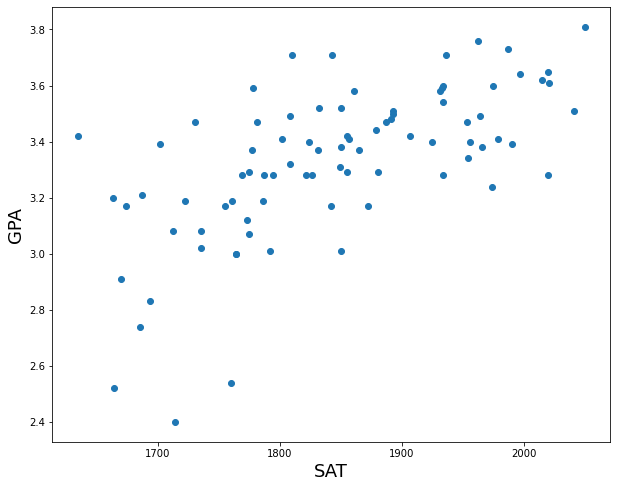

In [6]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.xlabel('SAT', fontsize=18)
plt.ylabel('GPA', fontsize=18)
plt.show()

### Adding a constant

    y = b0 + b1*x1 + e
    => y0 = b0*1 + b1*x1

In [7]:
x1 = sm.add_constant(x)

In [8]:
x1

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


### Ordinary Least Square (OLS)

In [9]:
model = sm.OLS(y, x1).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 07 Sep 2021   Prob (F-statistic):           7.20e-11
Time:                        13:15:18   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

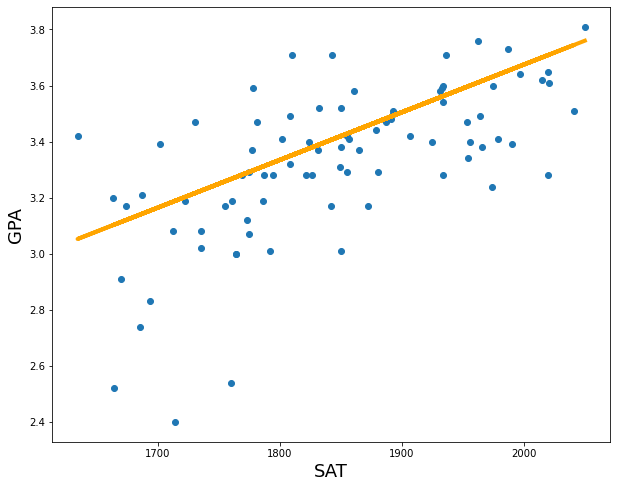

In [15]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x,y)
yhat = 0.2750 + 0.0017*x
plt.plot(x, yhat, lw=4, c='orange')
plt.xlabel("SAT", fontsize=18)
plt.ylabel("GPA", fontsize=18)
plt.show()

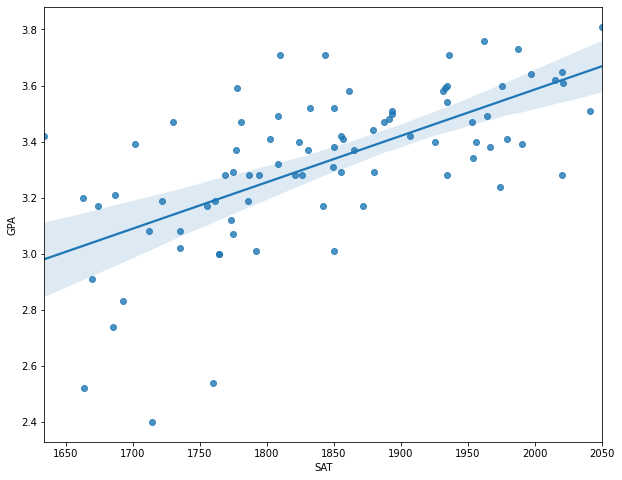

In [20]:
fig = plt.figure(figsize=(10,8))
sns.regplot(x='SAT',y='GPA', data=data)
plt.show()

### Prediction

In [21]:
# y = b0 + b1*x1

b0 = 0.2750
b1 = 0.0017

In [22]:
def gpa(x):
    y = b0 + b1 * x
    return y

In [23]:
gpa(1700)

3.1649999999999996

In [24]:
gpa(1300)

2.485

In [25]:
gpa(1900)

3.505

In [26]:
gpa(2000)

3.675

In [27]:
gpa(400)

0.955